<a href="https://colab.research.google.com/github/adnajihad/knn/blob/main/scratch_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 100
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter
import math

In [2]:
!git clone https://github.com/adnajihad/knn

Cloning into 'knn'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


# Function

In [22]:
def empty_check(data) :
  new_data = data.dropna(axis = 0, how ='any')
  print("Panjang dataframe sebelumnya:", len(data)) 
  print("Panjang dataframe setelah dilakukan pengecekan empty value :", len(new_data))  
  print("Jumlah baris dengan setidaknya 1 empty value : ", (len(data)-len(new_data))) 
  return new_data

In [23]:
# from sklearn.preprocessing import StandardScaler  #standarisasi
def scale(data) :

  # scaler = StandardScaler()
  # scaler.fit(data)
  # data_scaled = scaler.transform(data)

  # data_norm = pd.DataFrame(data_scaled)
  # data_norm = data_norm.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome'})
  
  # return data_norm

  #normalisasi
  scaler = MinMaxScaler(feature_range=(0, 1))

  data_scaled = scaler.fit_transform(data)
  data_norm = pd.DataFrame(data_scaled)
  data_norm = data_norm.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome'})

  return data_norm

In [24]:
def euclideanDistance(train, tes):
    x1 = train[0] - tes[0]
    x2 = train[1] - tes[1]
    x3 = train[2] - tes[2]
    x4 = train[3] - tes[3]
    x5 = train[4] - tes[4]
    a = np.hypot(x1,x2)
    b = np.hypot(x3,x4)
    c = np.hypot(a,b)
    return np.hypot(c,x5)

In [25]:
def findNeighborsDistance(tes,train):
    tempval = []
    temp = []
    
    for i in range(0,len(tes)):
        for j in range(0,len(train)):
            temp.append([euclideanDistance(train[j], tes[i]), train[j][8]])
        tempval.append(temp)
        temp = [] 
    return tempval

In [26]:
def getKNN(neighbors,k):
    temp = []
    KNN = []
    
    def IndexSort(data):
        return data[0]
    
    for i in range(len(neighbors)):
        neighbors[i].sort(key = IndexSort)
        
    for i in range(len(neighbors)):
        for j in range(0,k):
            temp.append(neighbors[i][j])
        KNN.append(temp)
        temp = []
    return KNN

In [27]:
# return data class prediksi
def predict(Test,Train,k):
    Distances = findNeighborsDistance(Test,Train)
    NearestNeighbors = getKNN(Distances,k)
    
    #nyisain class, ditampung ke variable validasi 2
    NearestNeighbors2 = []
    temp = []
    for i in range(len(NearestNeighbors)):
        for j in range(len(NearestNeighbors[i])):
            temp.append(NearestNeighbors[i][j][1])
        NearestNeighbors2.append(temp)
        temp = []

    #nampung HASIL Prediksi
    Hasil = []
    for i in range(len(NearestNeighbors2)):
        data = Counter(NearestNeighbors2[i])
        Hasil.append(data.most_common(1)[0][0])
        
    return Hasil 

In [28]:
def getAccuracy(tes, predictions):
    testSet = tes['Outcome'].values.tolist()
    correct = 0
    for x in range(len(predictions)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [48]:
def splitValidation(tes,train):
    data_x = train.to_numpy()
    data_y = tes.to_numpy()
    #Cari K
    K = []
    for i in range(len(data_y)):
        K.append((getAccuracy(tes,predict(data_y,data_x,i+1))))
        # print(i,K[i])
    return [K.index(max(K)), max(K)]

# Preprocessing Data

Read Data

In [30]:
data = pd.read_csv('/content/knn/Diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Check empty value

In [31]:
empty_check(data)

Panjang dataframe sebelumnya: 768
Panjang dataframe setelah dilakukan pengecekan empty value : 768
Jumlah baris dengan setidaknya 1 empty value :  0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Visualizing heatmap for data correlation

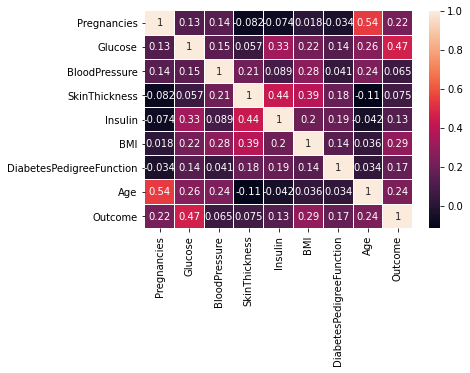

In [32]:
sns.heatmap(data.corr(), linewidths=.01, vmax=1, annot=True)

Data normalization

In [33]:
data = scale(data)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


Split data

In [34]:
#1.	Baris ke-1 sampai baris ke-614 sebagai training set dan sisanya sebagai testing set;
dt_train1 = data.iloc[0:613]
dt_test1 = data.iloc[614:767]
print('Panjang data train 1 :',len(dt_train1))
print('Panjang data test 1 :',len(dt_test1))
print()

#2.	Baris ke-1 sampai baris ke-461 ditambah baris ke-642 sampai 768 sebagai training set dan yang lain sebagai testing set;
dt_train2a = data.iloc[0:460]
dt_train2b = data.iloc[641:767]
dt_train2 = pd.concat([dt_train2a, dt_train2b])

dt_test2 = data.iloc[461:640]
print('Panjang data train 2 :',len(dt_train2))
print('Panjang data test 2 :',len(dt_test2))
print()

#3.	Baris ke-1 sampai baris ke-307 ditambah baris ke-462 sampai 768 sebagai training set dan yang lain sebagai testing set;
dt_train3a = data.iloc[0:306]
dt_train3b = data.iloc[461:767]
dt_train3 = pd.concat([dt_train3a, dt_train3b])

dt_test3 = data.iloc[307:460]
print('Panjang data train 3 :',len(dt_train3))
print('Panjang data test 3 :',len(dt_test3))
print()

#4.	Baris ke-1 sampai baris ke-154 ditambah baris ke-308 sampai 768 sebagai training set dan yang lain sebagai testing set;
dt_train4a = data.iloc[0:153]
dt_train4b = data.iloc[307:767]
dt_train4 = pd.concat([dt_train4a, dt_train4b])

dt_test4 = data.iloc[154:306]
print('Panjang data train 4 :',len(dt_train4))
print('Panjang data test 4 :',len(dt_test4))
print()

#5.	Baris ke-155 sampai sampai 768 sebagai training set dan yang lain sebagai testing set.
dt_train5 = data.iloc[154:767]
dt_test5 = data.iloc[0:153]
print('Panjang data train 5 :',len(dt_train5))
print('Panjang data test 5 :',len(dt_test5))
print()

Panjang data train 1 : 613
Panjang data test 1 : 153

Panjang data train 2 : 586
Panjang data test 2 : 179

Panjang data train 3 : 612
Panjang data test 3 : 153

Panjang data train 4 : 613
Panjang data test 4 : 152

Panjang data train 5 : 613
Panjang data test 5 : 153



# Main Program

No. 1 Baris ke-1 sampai baris ke-614 sebagai training set dan sisanya sebagai testing set;

In [49]:
CrossVal = splitValidation(dt_test1,dt_train1)
print("K : ",CrossVal[0],", Accuracy : ", CrossVal[1])

K :  27 , Accuracy :  75.81699346405229


No. 2 Baris ke-1 sampai baris ke-461 ditambah baris ke-642 sampai 768 sebagai training set dan yang lain sebagai testing set;

In [36]:
CrossVal = splitValidation(dt_test2,dt_train2)
print("K : ",CrossVal[0],", Accuracy : ", CrossVal[1])

K :  8 , Accuracy :  82.68156424581005


No. 3 Baris ke-1 sampai baris ke-307 ditambah baris ke-462 sampai 768 sebagai training set dan yang lain sebagai testing set;

In [37]:
CrossVal = splitValidation(dt_test3,dt_train3)
print("K : ",CrossVal[0],", Accuracy : ", CrossVal[1])

K :  59 , Accuracy :  75.81699346405229


No. 4 Baris ke-1 sampai baris ke-154 ditambah baris ke-308 sampai 768 sebagai training set dan yang lain sebagai testing set;

In [38]:
CrossVal = splitValidation(dt_test4,dt_train4)
print("K : ",CrossVal[0],", Accuracy : ", CrossVal[1])

K :  2 , Accuracy :  68.42105263157895


No. 5 Baris ke-155 sampai sampai 768 sebagai training set dan yang lain sebagai testing set.

In [39]:
CrossVal = splitValidation(dt_test5,dt_train5)
print("K : ",CrossVal[0],", Accuracy : ", CrossVal[1])

K :  7 , Accuracy :  78.43137254901961
